In [1]:
# import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\tasos\OneDrive\Desktop\Coffee Shop Sales.xlsx")

In [3]:
# dataset exploration

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [7]:
df['store_id'].unique()

array([5, 8, 3], dtype=int64)

In [8]:
df.groupby('store_location').count().sort_values('transaction_id', ascending=False)['store_id']

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: store_id, dtype: int64

In [9]:
df['Sales_per_category'] = df['transaction_qty'] * df['unit_price']
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Sales_per_category
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [10]:
# The code bellow is used to find the best location in terms of profit

In [11]:
df_per_loc = df.groupby('store_location').agg({'Sales_per_category': 'sum',}).reset_index()

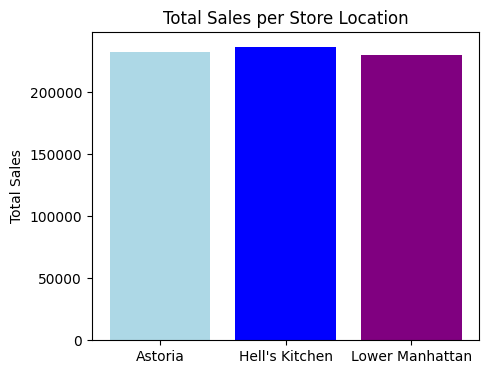

In [12]:
color = ['lightblue', 'blue', 'purple', 'red', 'black']
x = df_per_loc['store_location']
y = df_per_loc['Sales_per_category']

plt.figure(figsize=(5, 4))  # Create a figure

plt.bar(x ,y, color=color)  # Create a bar plot
#plt.xlabel('Store Location')  # Set the x-axis label
plt.ylabel('Total Sales')  # Set the y-axis label
plt.title('Total Sales per Store Location')  # Set the title
#plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels and align them to the right
#plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add horizontal
None

In [13]:
df_per_loc_avg = df.groupby('store_location').agg({'Sales_per_category': 'mean',}).reset_index()
df_per_loc_avg

,store_location,Sales_per_category
0,Astoria,4.589891
1,Hell's Kitchen,4.661696
2,Lower Manhattan,4.814726


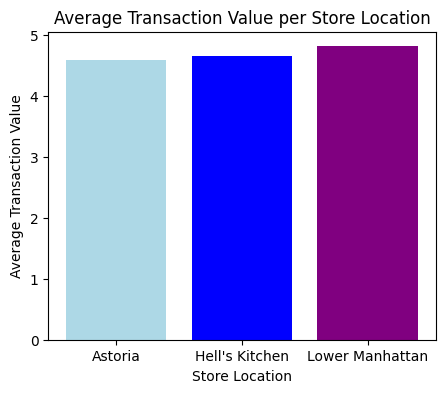

In [14]:
x = df_per_loc_avg['store_location']
y = df_per_loc_avg['Sales_per_category']

plt.figure(figsize=(5, 4))  # Create a figure

plt.bar(x ,y, color=color)  # Create a bar plot
plt.xlabel('Store Location')  # Set the x-axis label
plt.ylabel('Average Transaction Value')  # Set the y-axis label
plt.title('Average Transaction Value per Store Location')  # Set the title
#plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels and align them to the right
#plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add horizontal
None

In [15]:
# The code bellow is used to find the busiest hours

In [16]:
def get_day_of_week(date):
    days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days_of_week[date.weekday()]

df['day_of_week'] = df['transaction_date'].apply(get_day_of_week)
sales_per_weekday = df.groupby('day_of_week')['transaction_id'].count()
df['sales_per_weekday'] = df['day_of_week'].map(sales_per_weekday).astype(int)

In [17]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour
sales_per_hour = df.groupby('hour')['transaction_id'].count()
df['sales_per_hour'] = df['hour'].map(sales_per_hour).astype(int)

In [18]:
Coffee_Sales_Hours = pd.DataFrame(df.groupby('hour')['transaction_id'].count().reset_index())
Coffee_Sales_Hours

,hour,transaction_id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


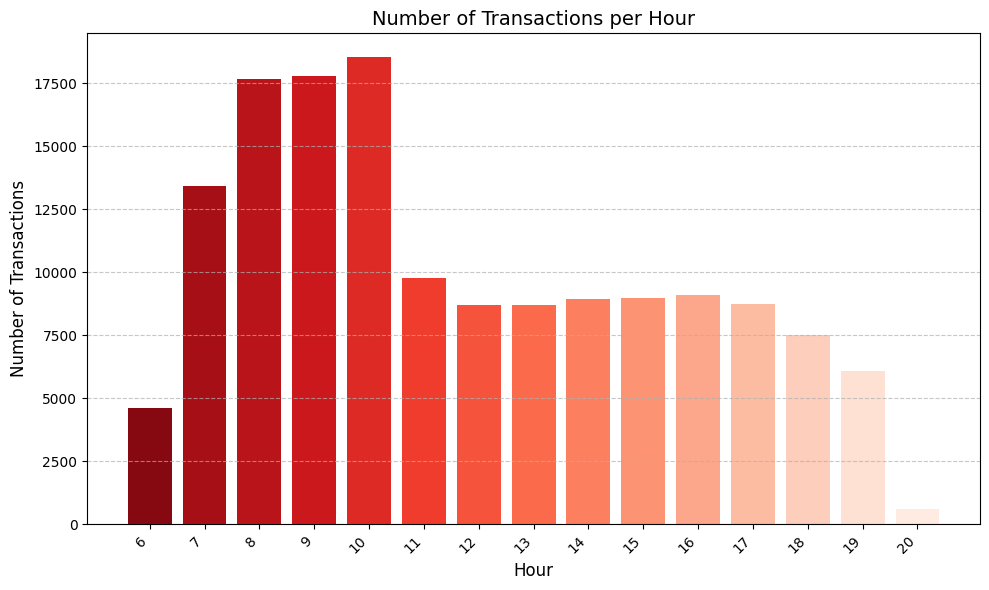

In [19]:
data = {
    'hour': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'transaction_id': [4594, 13428, 17654, 17764, 18545, 9766, 8708, 8714, 8933, 8979, 9093, 8745, 7498, 6092, 603]
}

Coffee_Sales_Hours = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Reds_r", len(Coffee_Sales_Hours["hour"]))

plt.bar(range(len(Coffee_Sales_Hours["hour"])), Coffee_Sales_Hours["transaction_id"], color=colors)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Number of Transactions per Hour', fontsize=14)


plt.xticks(range(len(Coffee_Sales_Hours["hour"])), Coffee_Sales_Hours["hour"], rotation=45, ha='right', fontsize=10)

plt.yticks(fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

In [20]:
 # for each of the stores in the dataset i try to find the best selling categories as well as the average price per catogory 

In [21]:
store_3 = df[df['store_id']== 3] 


In [22]:
store3_sales = pd.DataFrame(store_3.groupby('product_category')['Sales_per_category'].sum()).reset_index()
store3_sales

,product_category,Sales_per_category
0,Bakery,26599.75
1,Branded,5457.00
2,Coffee,89744.30
3,Coffee beans,10219.20
4,Drinking Chocolate,26335.25
5,Flavours,1764.80
6,Loose Tea,3194.00
7,Packaged Chocolate,1089.71
8,Tea,67839.90


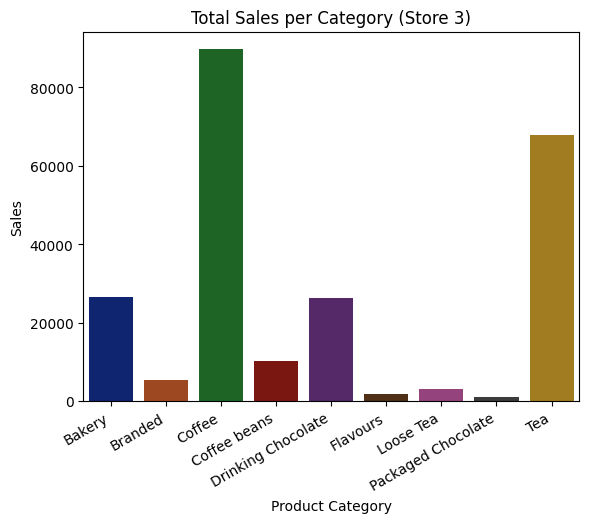

In [23]:
sns.barplot(x='product_category' , y='Sales_per_category', data=store3_sales, hue='product_category', palette='dark').set(title='Total Sales per Category (Store 3)')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=30, ha='right')
None

In [24]:
group_strore3 = pd.DataFrame(store_3.groupby('product_category')['transaction_id'].count()).reset_index()
group_strore3

,product_category,transaction_id
0,Bakery,7289
1,Branded,279
2,Coffee,20025
3,Coffee beans,502
4,Drinking Chocolate,4300
5,Flavours,1490
6,Loose Tea,344
7,Packaged Chocolate,110
8,Tea,16260


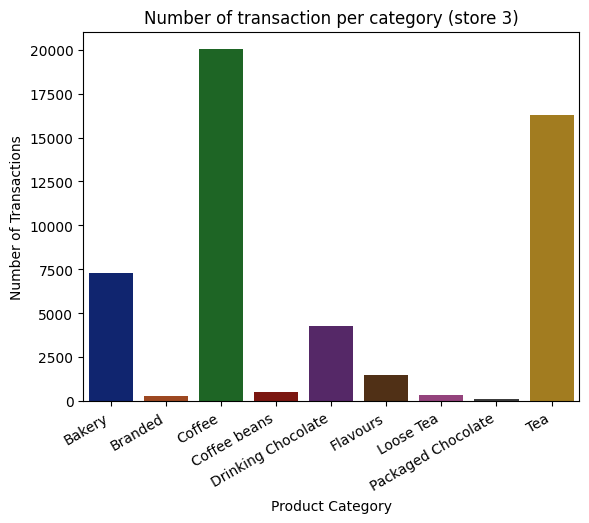

In [25]:
sns.barplot(x='product_category' , y='transaction_id', data=group_strore3, hue='product_category', palette='dark').set(title='Number of transaction per category (store 3)')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=30, ha='right')
None

In [26]:
mean_store3 = pd.DataFrame(store_3.groupby('product_category').mean('unit_price')['unit_price']).reset_index()
mean_store3

,product_category,unit_price
0,Bakery,3.545720
1,Branded,19.559140
2,Coffee,3.024235
3,Coffee beans,20.356972
4,Drinking Chocolate,4.144826
5,Flavours,0.800000
6,Loose Tea,9.284884
7,Packaged Chocolate,9.906455
8,Tea,2.822429


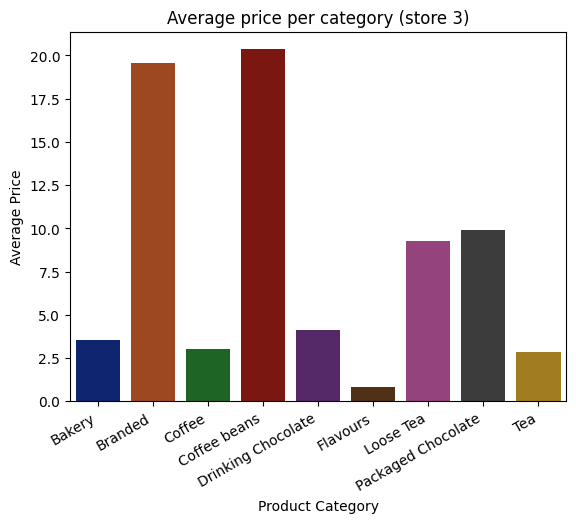

In [27]:
sns.barplot(x='product_category' , y='unit_price', data=mean_store3, hue='product_category', palette='dark').set(title='Average price per category (store 3)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=30, ha='right')
None

In [28]:
store_5 = df[df['store_id']== 5]

In [29]:
store5_sales = pd.DataFrame(store_5.groupby('product_category')['Sales_per_category'].sum()).reset_index()
store5_sales

,product_category,Sales_per_category
0,Bakery,28328.94
1,Branded,6208.00
2,Coffee,88985.50
3,Coffee beans,11230.95
4,Drinking Chocolate,22494.50
5,Flavours,3767.20
6,Loose Tea,3558.25
7,Packaged Chocolate,1619.16
8,Tea,63864.75


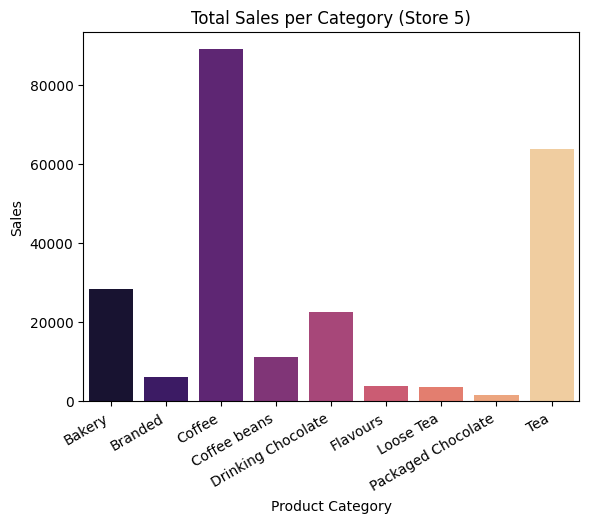

In [30]:
sns.barplot(x='product_category' , y='Sales_per_category', data=store5_sales, hue='product_category', palette='magma').set(title='Total Sales per Category (Store 5)')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=30, ha='right')
None

In [31]:
group_strore5 = pd.DataFrame(store_5.groupby('product_category')['transaction_id'].count()).reset_index()
group_strore5

,product_category,transaction_id
0,Bakery,7890
1,Branded,349
2,Coffee,18204
3,Coffee beans,531
4,Drinking Chocolate,3405
5,Flavours,2930
6,Loose Tea,381
7,Packaged Chocolate,180
8,Tea,13912


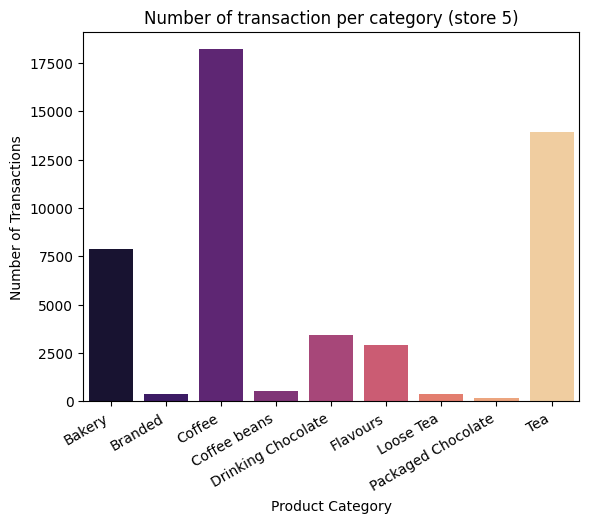

In [32]:
sns.barplot(x='product_category' , y='transaction_id', data=group_strore5, hue='product_category', palette='magma').set(title='Number of transaction per category (store 5)')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=30, ha='right')
None

In [33]:
mean_store5 = pd.DataFrame(store_5.groupby('product_category').mean('unit_price')['unit_price']).reset_index()
mean_store5

,product_category,unit_price
0,Bakery,3.540106
1,Branded,16.727794
2,Coffee,3.031622
3,Coffee beans,20.981073
4,Drinking Chocolate,4.141850
5,Flavours,0.800000
6,Loose Tea,9.339239
7,Packaged Chocolate,8.995333
8,Tea,2.813578


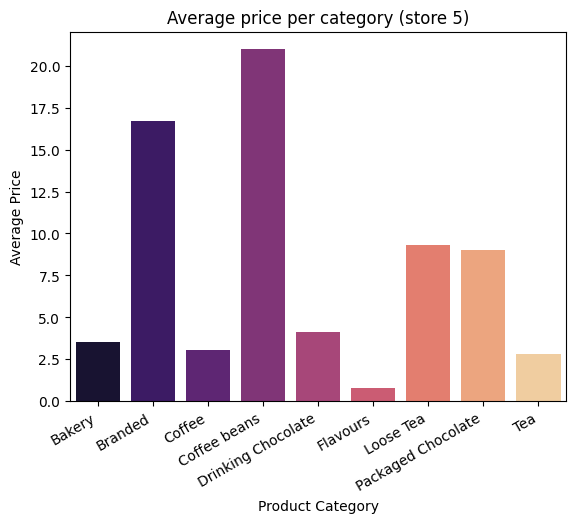

In [34]:
sns.barplot(x='product_category' , y='unit_price', data=mean_store5, hue='product_category', palette='magma').set(title='Average price per category (store 5)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=30, ha='right')
None

In [35]:
store_8 = df[df['store_id']== 8]

In [36]:
store8_sales = pd.DataFrame(store_8.groupby('product_category')['Sales_per_category'].sum()).reset_index()
store8_sales

,product_category,Sales_per_category
0,Bakery,27386.95
1,Branded,1942.00
2,Coffee,91222.65
3,Coffee beans,18635.10
4,Drinking Chocolate,23586.25
5,Flavours,2876.80
6,Loose Tea,4461.35
7,Packaged Chocolate,1698.77
8,Tea,64701.30


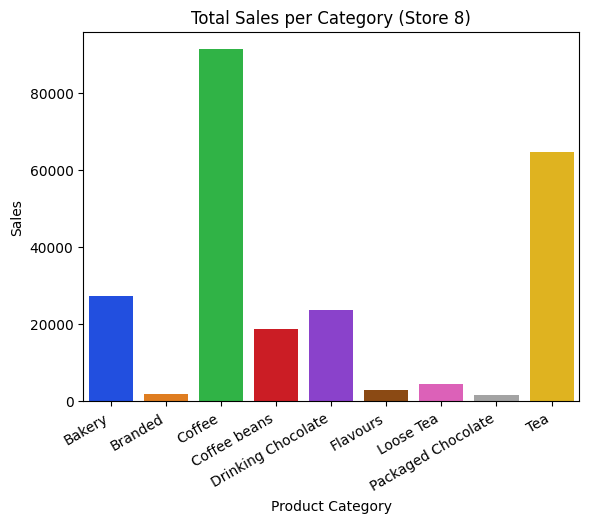

In [37]:
sns.barplot(x='product_category' , y='Sales_per_category', data=store8_sales, hue='product_category', palette='bright').set(title='Total Sales per Category (Store 8)')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation=30, ha='right')
None

In [38]:
group_strore8 = pd.DataFrame(store_8.groupby('product_category')['transaction_id'].count()).reset_index()
group_strore8

,product_category,transaction_id
0,Bakery,7617
1,Branded,119
2,Coffee,20187
3,Coffee beans,720
4,Drinking Chocolate,3763
5,Flavours,2370
6,Loose Tea,485
7,Packaged Chocolate,197
8,Tea,15277


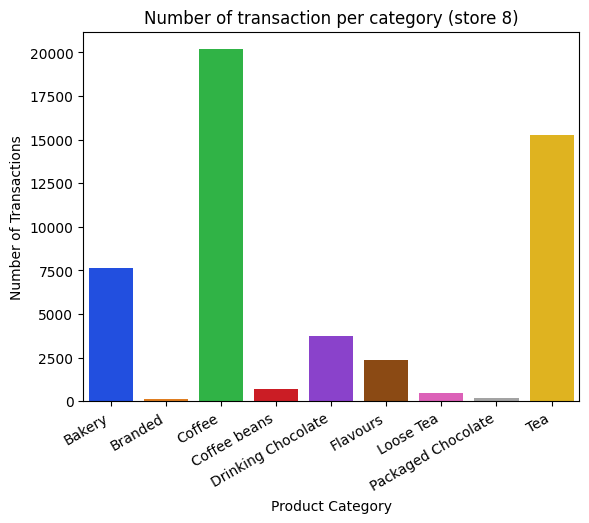

In [39]:
sns.barplot(x='product_category' , y='transaction_id', data=group_strore8, hue='product_category', palette='bright').set(title='Number of transaction per category (store 8)')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=30, ha='right')
None

In [40]:
mean_store8 = pd.DataFrame(store_8.groupby('product_category').mean('unit_price')['unit_price']).reset_index()
mean_store8

,product_category,unit_price
0,Bakery,3.569378
1,Branded,16.319328
2,Coffee,3.015869
3,Coffee beans,21.507083
4,Drinking Chocolate,4.159713
5,Flavours,0.800000
6,Loose Tea,9.198660
7,Packaged Chocolate,8.623198
8,Tea,2.814699


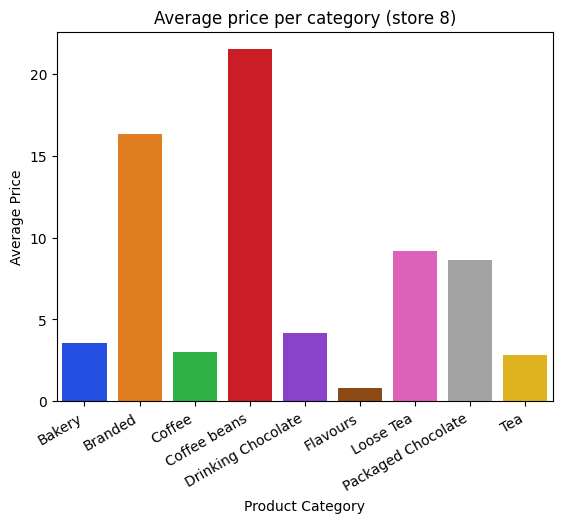

In [41]:
sns.barplot(x='product_category' , y='unit_price', data=mean_store8, hue='product_category', palette='bright').set(title='Average price per category (store 8)')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=30, ha='right')
None